In [4]:
### Arbol de Decision
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [5]:
X,y=make_classification(n_samples=1000)

In [6]:
pd.DataFrame(X).shape

(1000, 20)

In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

In [9]:
Arbol=DecisionTreeClassifier(max_depth=4,random_state=1234)

In [10]:
Arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1234)

In [11]:
y_pred=Arbol.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

In [13]:
confusion_matrix(y_test,y_pred)

array([[146,   5],
       [ 13, 136]], dtype=int64)

In [14]:
accuracy_score(y_test,y_pred)

0.94

In [15]:
recall_score(y_test,y_pred)

0.912751677852349

In [16]:
precision_score(y_test,y_pred)

0.9645390070921985

In [17]:
dict(zip(pd.DataFrame(X_train), Arbol.feature_importances_))

{0: 0.0,
 1: 0.05276420938553423,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.013153635495221609,
 12: 0.018362319302606126,
 13: 0.013262542619956772,
 14: 0.8656771774257779,
 15: 0.0,
 16: 0.02352904593868021,
 17: 0.013251069832223251,
 18: 0.0,
 19: 0.0}

In [18]:
from sklearn.tree import export_graphviz

In [19]:
export_graphviz(Arbol,filled=True)

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[14] <= -0.099\\ngini = 0.5\\nsamples = 700\\nvalue = [351, 349]", fillcolor="#fffefe"] ;\n1 [label="X[1] <= -0.507\\ngini = 0.087\\nsamples = 328\\nvalue = [15, 313]", fillcolor="#42a2e6"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 7\\nvalue = [7, 0]", fillcolor="#e58139"] ;\n1 -> 2 ;\n3 [label="X[1] <= 0.373\\ngini = 0.049\\nsamples = 321\\nvalue = [8, 313]", fillcolor="#3ea0e6"] ;\n1 -> 3 ;\n4 [label="X[13] <= -0.283\\ngini = 0.397\\nsamples = 22\\nvalue = [6, 16]", fillcolor="#83c2ef"] ;\n3 -> 4 ;\n5 [label="gini = 0.124\\nsamples = 15\\nvalue = [1, 14]", fillcolor="#47a4e7"] ;\n4 -> 5 ;\n6 [label="gini = 0.408\\nsamples = 7\\nvalue = [5, 2]", fillcolor="#efb388"] ;\n4 -> 6 ;\n7 [label="X[12] <= -2.241\\ngini = 0.013\\nsamples = 299\\nvalue = [2, 297]", fillcolor="#3a9ee5"] ;\n3 -> 7 ;\n8 [label="

In [20]:
from sklearn.tree import plot_tree

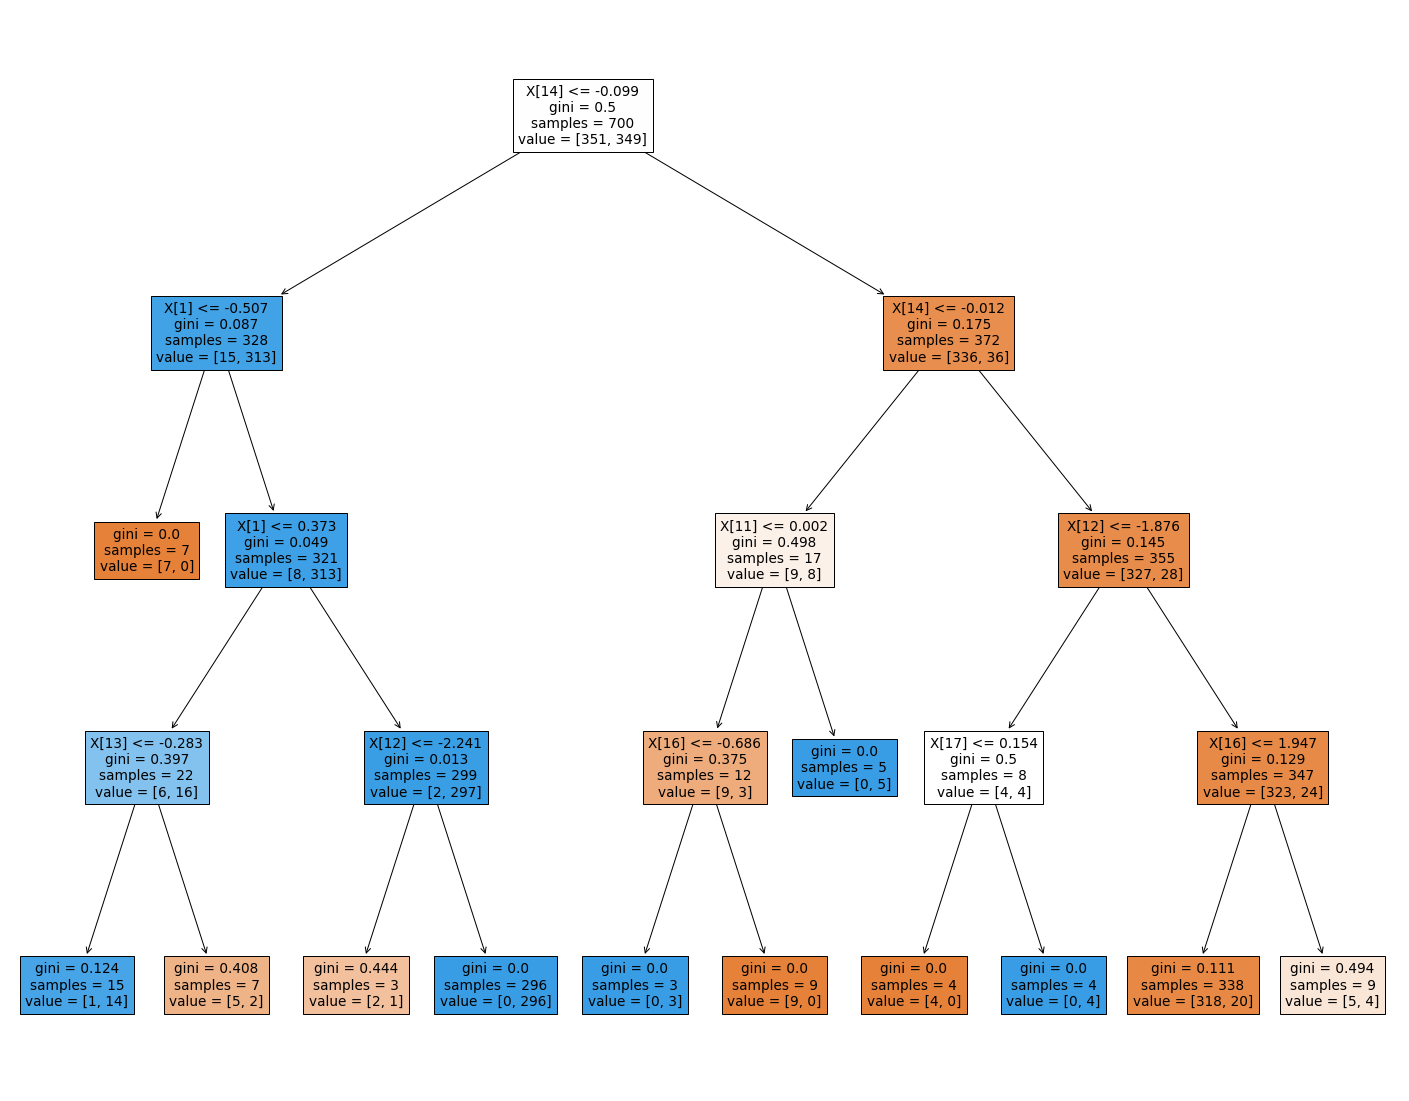

In [21]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,20))

plot_tree(Arbol,filled=True);

In [22]:
### ExtraTreeCLasifier

In [23]:
from sklearn.tree import ExtraTreeClassifier

In [24]:
Arbol_Extra=ExtraTreeClassifier(max_depth=4)

In [25]:
Arbol_Extra.fit(X_train,y_train)

ExtraTreeClassifier(max_depth=4)

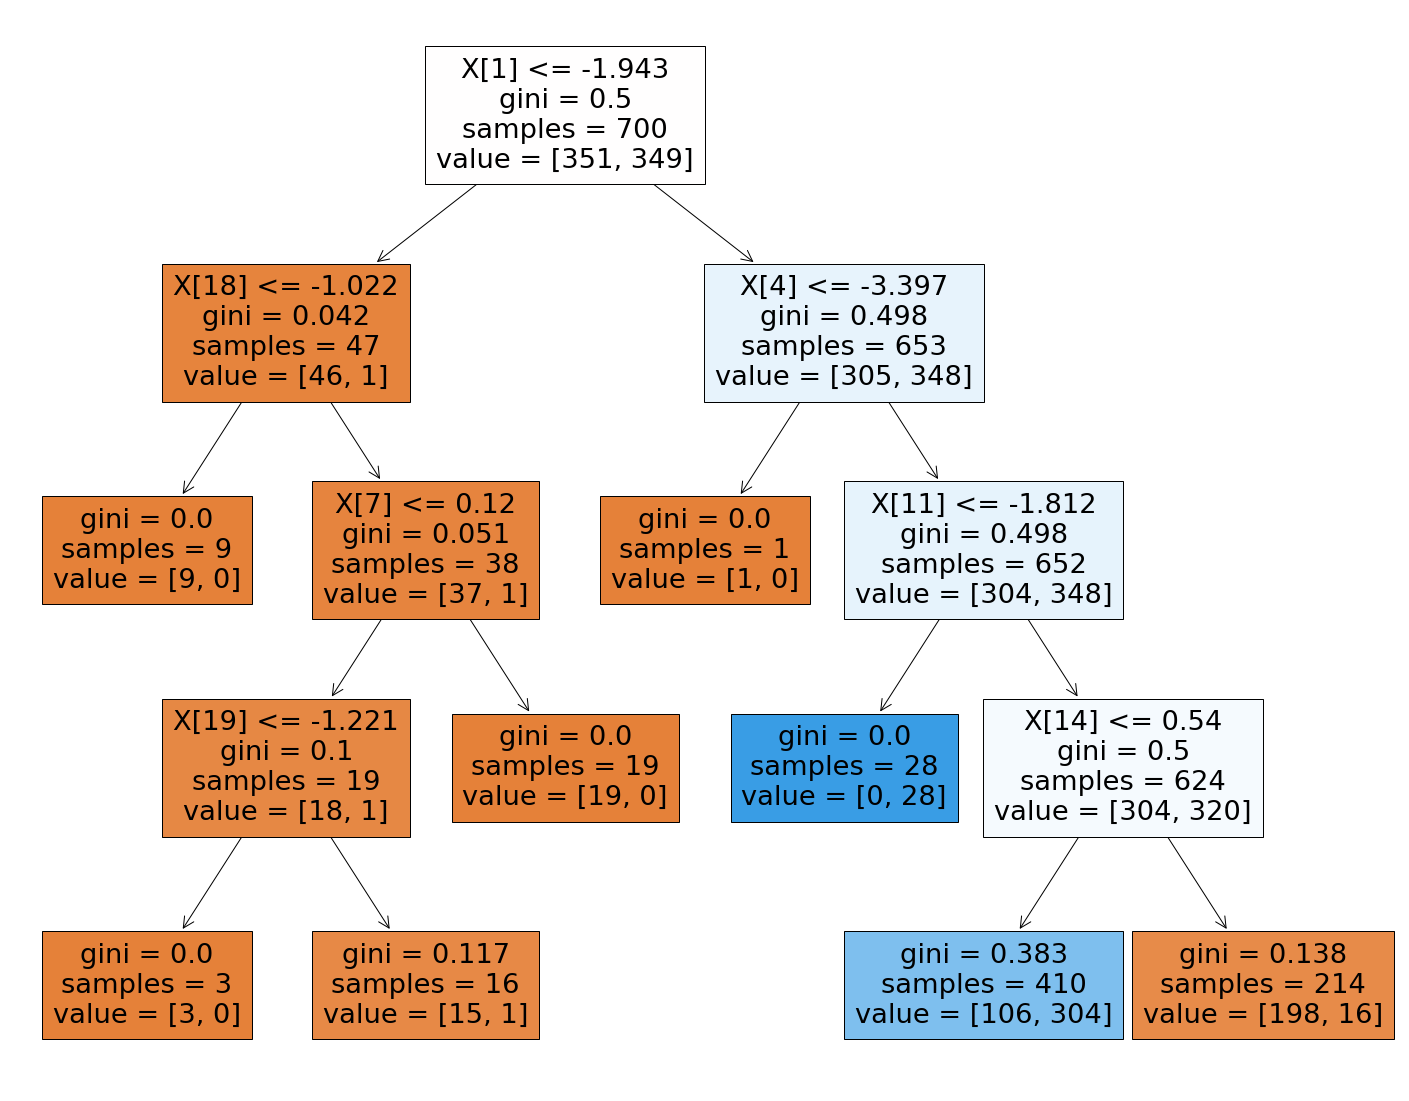

In [26]:
plt.figure(figsize=(25,20))
plot_tree(Arbol_Extra,filled=True);

In [27]:
from sklearn.datasets import load_wine

In [28]:
print(load_wine()['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [37]:
X_train,X_test,y_train,y_test=train_test_split(load_wine()["data"],load_wine()["target"])

In [38]:
from sklearn.multiclass import OneVsRestClassifier

In [39]:
modelo=DecisionTreeClassifier()
modelo_Multiclase=OneVsRestClassifier(modelo)
modelo_Multiclase.fit(X_train,y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [40]:
from sklearn.multiclass import OneVsOneClassifier

In [45]:
modelo_V1=DecisionTreeClassifier()
modelo_Multiclase_V1=OneVsOneClassifier(modelo_V1)
modelo_Multiclase_V1.fit(X_train,y_train)

OneVsOneClassifier(estimator=DecisionTreeClassifier())

In [46]:
from sklearn.metrics import accuracy_score,classification_report

In [47]:
print(classification_report(y_test,modelo_Multiclase_V1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.96      0.96      0.96        24
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [48]:
print(classification_report(y_test,modelo_Multiclase.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.92      0.96        24
           2       1.00      1.00      1.00        13

    accuracy                           0.96        45
   macro avg       0.93      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



In [49]:
from sklearn.metrics import precision_score

In [50]:
precision_score(y_test,modelo_Multiclase.predict(X_test))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [52]:
modelo_Multiclase.predict_proba(X_test)

c:\Users\Daniel Montes\Anaconda3\lib\site-packages\sklearn\multiclass.py:502: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


array([[0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0.5, 0. , 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 